### Radiation Diagnostic

In [1]:
import sys
sys.path.insert(0,'../../')
from radiation import process_ceres_data, process_model_data
from radiation import plot_bias, plot_maps, plot_mean_bias

### Loading the data we need for the analysis
First we retrieve and process (-> creating fldmeans) some data from the CERES and model output catalogues using the respective functions

In [2]:
lumi=False

In [3]:
if lumi:
    ifs_4km = process_model_data(model =  'IFS' , exp = 'historical-1990-devcon' , source = 'lra-r100-monthly')
else:
    ifs_4km = process_model_data(model =  'IFS' , exp = 'tco2559-ng5-cycle3' , source = 'lra-r100-monthly')
ceres = process_ceres_data(exp = "ebaf-toa41", source = "monthly")
era5 = process_model_data(model = 'ERA5', exp = 'era5', source = 'monthly')

2023-10-24 19:43:50 :: Reader :: WARNING  -> You are asking for var ['2t', 'mtntrf', 'mtnsrf'] which is already fixed from ['2t', 'ttr', 'tsr'].
2023-10-24 19:43:50 :: Reader :: WARNING  -> It would be safer to run with fix=False
2023-10-24 19:43:50 :: Reader :: WARNING  -> You are asking for var ['2t', 'mtntrf', 'mtnsrf'] which is already fixed from ['2t', 'ttr', 'tsr'].
2023-10-24 19:43:50 :: Reader :: WARNING  -> Would be safer to run with fix=False
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua_common/lib/python3.11/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]


### Plotting bias maps to show where biases are located
To visualize the biases of a model climatology with respect to the observation (we use the CERES data for reference) we plot the bias map and use the plot_mean_bias function.

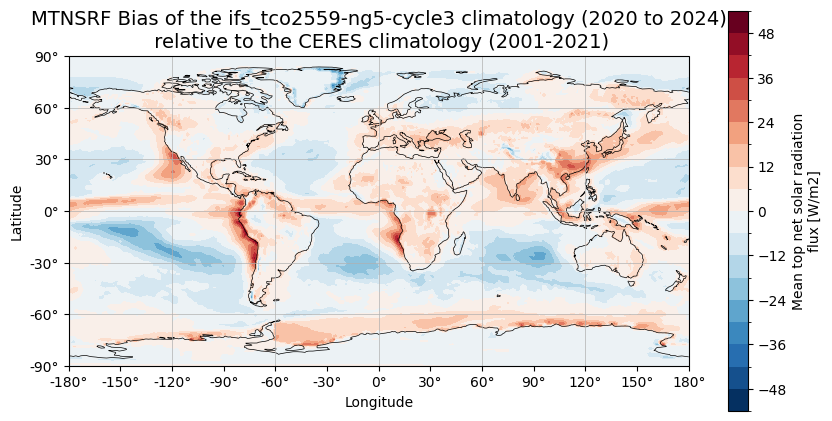

In [7]:
if lumi:
    plot_mean_bias(era5, var='mtnsrf', ceres=ceres, start_year='1990', end_year='1991') 
else:
    plot_mean_bias(ifs_4km, var='mtnsrf', ceres=ceres, start_year='2020', end_year='2024')

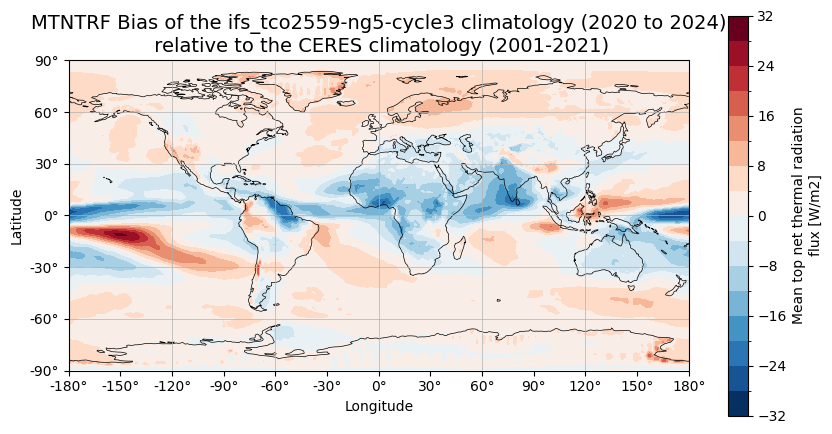

In [8]:
if lumi:
    plot_mean_bias(era5, var='mtntrf', ceres=ceres, start_year='1990', end_year='1991')
else:
    plot_mean_bias(ifs_4km, var='mtntrf', ceres=ceres, start_year='2020', end_year='2024', outputdir='./', outputfig='./')